<a href="https://colab.research.google.com/github/hsh6449/TIL/blob/main/pytorch/torch_7_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## #1 로지스틱 회귀
- 시그모이드 함수
- $sigmoid(x) = \frac{1}{1+e^-(Wx+b)}$

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [6]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

Text(0.5, 1.0, 'sigmoid plot')

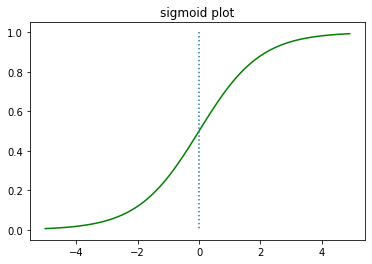

In [14]:
plt.plot(x,y,'-g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('sigmoid plot')

Text(0.5, 1.0, 'sigmoid plot')

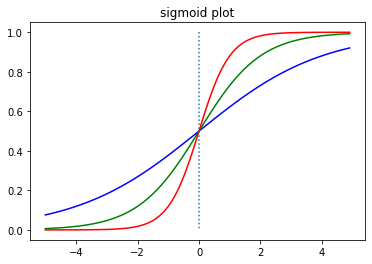

In [16]:
# W값 변화에 따른 모양

y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'b')
plt.plot(x,y2,'g')
plt.plot(x,y3,'r')
plt.plot([0,0],[1.0,0.0],':')
plt.title('sigmoid plot')


Text(0.5, 1.0, 'sigmoid plot')

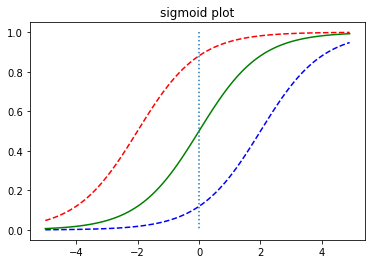

In [18]:
# b값 변화에 따른 모양

y1 = sigmoid(-2+x)
y2 = sigmoid(x)
y3 = sigmoid(2+x)

plt.plot(x,y1,'--b')
plt.plot(x,y2,'g')
plt.plot(x,y3,'--r')
plt.plot([0,0],[1.0,0.0],':')
plt.title('sigmoid plot')

## #2 로지스틱 회귀 파이토치로 구현

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
torch.manual_seed(1)

In [22]:
x_data = [[1,2],[2,4],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [23]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
x_train.shape, y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [25]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [26]:
hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b))) #or torch.sigmoid(x_train.matmul(W)+b)

In [27]:
hypothesis

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)

In [28]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [38]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train)*torch.log(1-hypothesis))

losses

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

In [39]:
cost = losses.mean()

In [40]:

cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [42]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [47]:
# 훈련과정
x_data = [[1,2],[2,4],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([W,b],lr = 1)

epochs = 1000

for epoch in range(epochs+1):
 hypothesis = torch.sigmoid(x_train.matmul(W)+b)
 cost = -(y_train * torch.log(hypothesis) + (1 - y_train)*torch.log(1-hypothesis)).mean()

 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 if epoch % 100 == 0:
   print("Epoch {:4d}/{} Cost {:.6f}".format(epoch,epochs,cost.item()))

Epoch    0/1000 Cost 0.693147
Epoch  100/1000 Cost 0.150459
Epoch  200/1000 Cost 0.094799
Epoch  300/1000 Cost 0.069868
Epoch  400/1000 Cost 0.055470
Epoch  500/1000 Cost 0.046038
Epoch  600/1000 Cost 0.039361
Epoch  700/1000 Cost 0.034379
Epoch  800/1000 Cost 0.030517
Epoch  900/1000 Cost 0.027434
Epoch 1000/1000 Cost 0.024915


In [48]:
W, b

(tensor([[3.6442],
         [0.9785]], requires_grad=True),
 tensor([-14.7092], requires_grad=True))

In [49]:
hypothesis

tensor([[1.1108e-04],
        [2.9146e-02],
        [5.7477e-02],
        [9.4279e-01],
        [9.9841e-01],
        [9.9989e-01]], grad_fn=<SigmoidBackward0>)

In [50]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


## #3 nn모듈로 로지스틱 회귀


In [52]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [53]:
model(x_train)

tensor([[0.3600],
        [0.1715],
        [0.6801],
        [0.4389],
        [0.5216],
        [0.7473]], grad_fn=<SigmoidBackward0>)

In [58]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for epoch in range(epochs + 1):
  hypothesis = model(x_train)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
        epoch, epochs, cost.item(), accuracy * 100))

Epoch    0/1000 Cost: 0.589938 Accuracy 66.67%
Epoch   10/1000 Cost: 0.528998 Accuracy 83.33%
Epoch   20/1000 Cost: 0.513680 Accuracy 83.33%
Epoch   30/1000 Cost: 0.501084 Accuracy 83.33%
Epoch   40/1000 Cost: 0.490159 Accuracy 83.33%
Epoch   50/1000 Cost: 0.480324 Accuracy 83.33%
Epoch   60/1000 Cost: 0.471241 Accuracy 83.33%
Epoch   70/1000 Cost: 0.462707 Accuracy 83.33%
Epoch   80/1000 Cost: 0.454595 Accuracy 83.33%
Epoch   90/1000 Cost: 0.446822 Accuracy 83.33%
Epoch  100/1000 Cost: 0.439335 Accuracy 83.33%
Epoch  110/1000 Cost: 0.432097 Accuracy 83.33%
Epoch  120/1000 Cost: 0.425082 Accuracy 83.33%
Epoch  130/1000 Cost: 0.418272 Accuracy 83.33%
Epoch  140/1000 Cost: 0.411653 Accuracy 83.33%
Epoch  150/1000 Cost: 0.405214 Accuracy 83.33%
Epoch  160/1000 Cost: 0.398947 Accuracy 83.33%
Epoch  170/1000 Cost: 0.392845 Accuracy 83.33%
Epoch  180/1000 Cost: 0.386902 Accuracy 83.33%
Epoch  190/1000 Cost: 0.381112 Accuracy 83.33%
Epoch  200/1000 Cost: 0.375471 Accuracy 83.33%
Epoch  210/10

In [59]:
model(x_train)

tensor([[0.0294],
        [0.1339],
        [0.3698],
        [0.7499],
        [0.9315],
        [0.9831]], grad_fn=<SigmoidBackward0>)

- 로지스틱 회귀는 인공신경망으로 간주가능

## #4 Class로 구현

- __init__()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출
- self가 있으면 자동으로 되는듯?

In [67]:
class BinaryC(nn.Module) :
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.linear(x))

In [68]:
model = BinaryC()

In [69]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.755238 Accuracy 50.00%
Epoch   10/1000 Cost: 0.633863 Accuracy 83.33%
Epoch   20/1000 Cost: 0.563394 Accuracy 83.33%
Epoch   30/1000 Cost: 0.477787 Accuracy 83.33%
Epoch   40/1000 Cost: 0.410422 Accuracy 83.33%
Epoch   50/1000 Cost: 0.347525 Accuracy 83.33%
Epoch   60/1000 Cost: 0.288665 Accuracy 83.33%
Epoch   70/1000 Cost: 0.235669 Accuracy 83.33%
Epoch   80/1000 Cost: 0.192692 Accuracy 83.33%
Epoch   90/1000 Cost: 0.164762 Accuracy 100.00%
Epoch  100/1000 Cost: 0.150438 Accuracy 100.00%
Epoch  110/1000 Cost: 0.141570 Accuracy 100.00%
Epoch  120/1000 Cost: 0.134069 Accuracy 100.00%
Epoch  130/1000 Cost: 0.127367 Accuracy 100.00%
Epoch  140/1000 Cost: 0.121334 Accuracy 100.00%
Epoch  150/1000 Cost: 0.115872 Accuracy 100.00%
Epoch  160/1000 Cost: 0.110903 Accuracy 100.00%
Epoch  170/1000 Cost: 0.106359 Accuracy 100.00%
Epoch  180/1000 Cost: 0.102189 Accuracy 100.00%
Epoch  190/1000 Cost: 0.098346 Accuracy 100.00%
Epoch  200/1000 Cost: 0.094792 Accuracy 100.00%
E